In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Abalone Age Prediction Using Regression
#### The Abalone Set
The abalone set contains about 10,000 rows of generated data for the use of practice only. This is to show that if given real data to train on, machine learning can be used in the same way. Our data contains an already indexed 'id' variable and will be our choice for identifying individual rows. There are 9 other numerical columns regarding the different measurements of abalone, with the responding variable of 'Rings' to define age. After some preliminary research, the rings on an Abalone grow at a rate very close to one ring per year.

In [ ]:
test = pd.read_csv('test.csv')
test

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...,...
60406,151021,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,151022,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,151023,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,151024,F,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


In [ ]:
train = pd.read_csv('train.csv')
train

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...,...
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


#### Exploratory Data Analysis

##### Feature Types

Our shown datatypes are nearly purely numerical, which is extremely convenient for regression. The issues that can be seen from the diffrent types arise with the 'Sex' feature, and our responding feature 'Rings'.

In [ ]:
types = train.dtypes
print(types)

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object


##### NaN Values and Data Interpolation

Given the generated nature of our data, it makes complete sense for there to be no NaN values in the set. Thank god they didn't add them just for fun. Nothing is needed here.

In [ ]:
nan_counts = train.isnull().sum()
print(nan_counts)

nan_counts_test = test.isnull().sum()
print(nan_counts_test)

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64
id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64


#### Feature Normalization and One-Hot-Encoding

We are again blessed by the generated nature of this set. Given that the responding variable relates to only full rings, no normalization is needed here, and regression can be performed such that the outcome may be partial rings. Now the only manipulation that needs to be done is on the 'Sex' feature, with one hot encoding.

In [ ]:
# for test set
test = pd.get_dummies(test, columns=['Sex'], dtype=int)

# for train set
train = pd.get_dummies(train, columns=['Sex'], dtype=int)

###### Correlation Matrix
The correlation matrix shows an extremely high correlation between all of the features and each other, except the one hot encoded feature. This is to be expected given each of the features is responding to a physical measurement. Somewhat surprisingly, the one hot encoded feature for the 'Indiscriminate' sex is highly negatively correlated with the different physical measurements. This is very likely caused by the 'Indiscriminate' gender to be more prevalent in younger ages of Abalone.

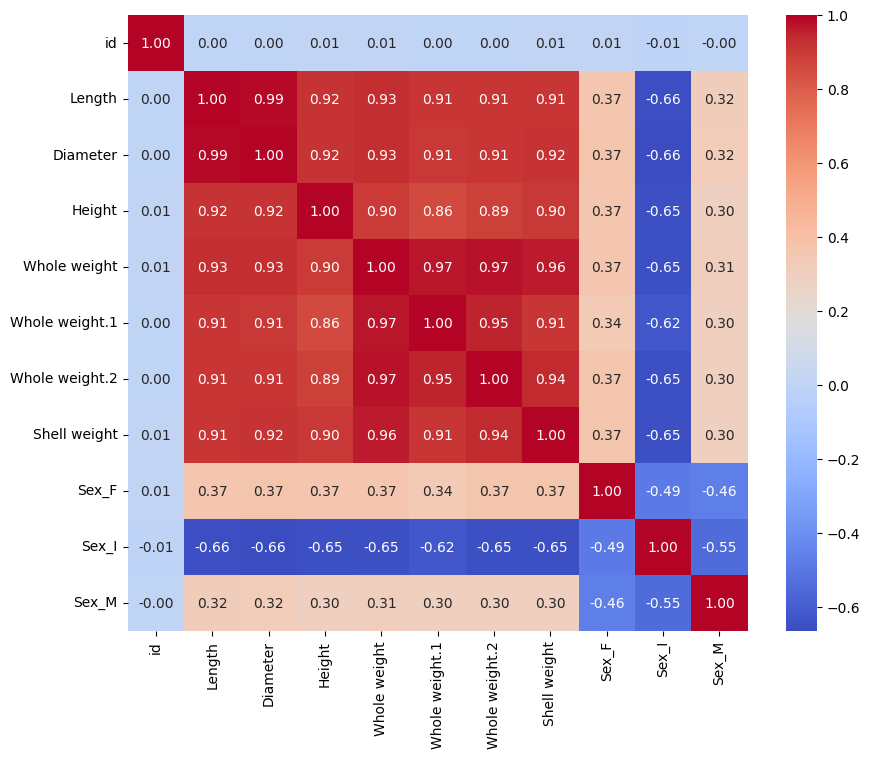

In [ ]:
features = train.drop('Rings', axis = 1)
correlation_matrix = features.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
test

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_F,Sex_I,Sex_M
0,90615,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,0,0,1
1,90616,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,0,0,1
2,90617,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,0,0,1
3,90618,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,0,0,1
4,90619,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
60406,151021,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500,0,1,0
60407,151022,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050,1,0,0
60408,151023,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650,0,1,0
60409,151024,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350,1,0,0


#### Modeling

##### Model Selection

We have a vast array of different regression models to choose from for a problem like this. We will try a few different ones here. We will begin with simple multiple linear regression. This model is not powerful or robust, but it is easily interpretable, and can also be a very effective predictive tool. Next, we will do LASSO regression, a powerful and robust method that scales certain features to zero. We will then test a random forest regression model and compare it to the LASSO model. It is unlikely that the multiple linear regression will perform effectively, but if the performance is decent, we can use it for feature analysis more directly.

##### Train-Test Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Feature set
X = train.drop('Rings', axis = 1)

# Responding variable
y = train['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Multiple Linear Regression

Our multiple linear regression model performed better than initially expected. An r^2 score of 0.6 relates to 60% of the variance in the data being modeled correctly encompassed by our features. From our feature analysis, we can see that important features are 'Weight', 'Height', and 'Whole_Weight.1', followed by 'Diameter', 'Whole_weight.2', and 'Whole. weight'. Features that are not considered important here were all the one-hot-encoded 'Sex' features. This makes sense, as much of the 'Sex' feature was labeled as 'I' or Indeterminate.

In [ ]:
lgm = LinearRegression()
lgm.fit(X_train, y_train)

y_pred = lgm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {rmse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 2.0237293747135707
R-Squared: 0.6013104882981961


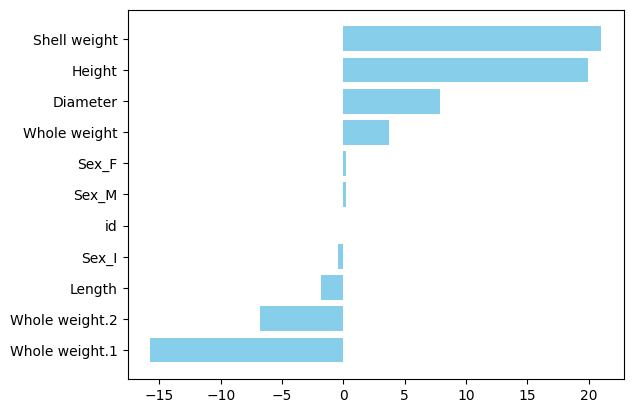

In [ ]:
coefficients = lgm.coef_

feature_names = X_train.columns
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coeff_df = coeff_df.sort_values(by='Coefficient', ascending=True)
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='skyblue')

plt.show()


##### LASSO Regression

This is a very surprising outcome. LASSO regression is performing significantly worse than that of the multiple linear regression model. After checking the model for heteroscedasticity and normality of the residual values, it is clear that hetroscedasity is present in the data, and that the residual values are not normally distributed. We can thus no longer trust the predictive power of our parametric models here. Alternatively, we can transform our dependent variable with Box-Cox or log transformations.


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LassoCV

# LASSO Cross Validation with 5 fold validation (computationally inexpensive)
# LOO validation uses all ram
lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000, random_state=42)

# Fit model will auto use our lambda value
lasso_cv.fit(X_train, y_train)

y_pred_lasso = lasso_cv.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Mean Squared Error: {rmse_lasso}")
print(f"R-Squared: {r2_lasso}")


Mean Squared Error: 2.4920259090670633
R-Squared: 0.39544607341303106


###### Heteroscedasticity and Normality of Residual Values

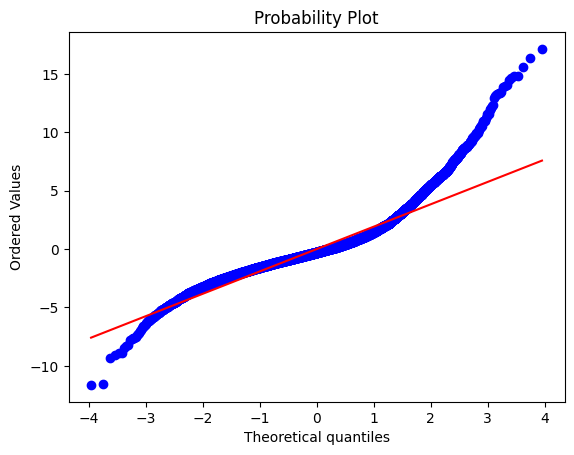

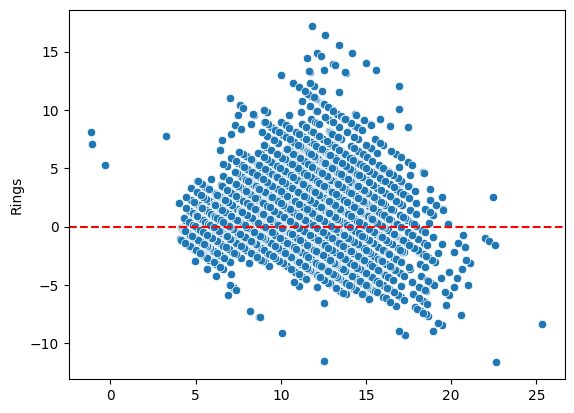

In [ ]:
import scipy.stats as stats
import seaborn as sns

residuals = y_test - y_pred

stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()



###### Box-Cox Transformation

The Box-Cox transformation is an excellent way of dealing with heteroscedasticity and concern for the normality of residuals. It is also perfect for our use, as the responding 'Rings' feature cannot be negative. We will still need to add a minuscule value to all zeros such that we can perform the transformation. We will test the LASSO model again with the transformation. We will also be doing this transformation on the Multiple Linear Regression model for interpretation of the coefficients.

In [ ]:
from scipy.stats import boxcox

epsilon = np.finfo(float).eps

y_ad = y + epsilon

# Adjusting our values
y_ad = tr_y, best_lambda = boxcox(y)

X_tr, X_te, y_tr, y_te = train_test_split(X, tr_y, test_size=0.2, random_state=42)

###### New LASSO
Our LASSO model is still not working as intended. And still less effective than our regular multiple linear regression model, this is likely due to the zeroing of certain features in the model to 0, resulting in lost, significant data.

Mean Squared Error: 0.254076047384061
R-Squared: 0.6552567189998837
id: -6.925929474308134e-08
Length: 0.6801923734471071
Diameter: 1.3233043933354383
Height: 1.57299075589988
Whole weight: 0.12451070461112701
Whole weight.1: -1.6970467733145922
Whole weight.2: -0.0
Shell weight: 2.2611962670678456
Sex_F: 0.0017158513010168035
Sex_I: -0.10508500648637784
Sex_M: -0.0


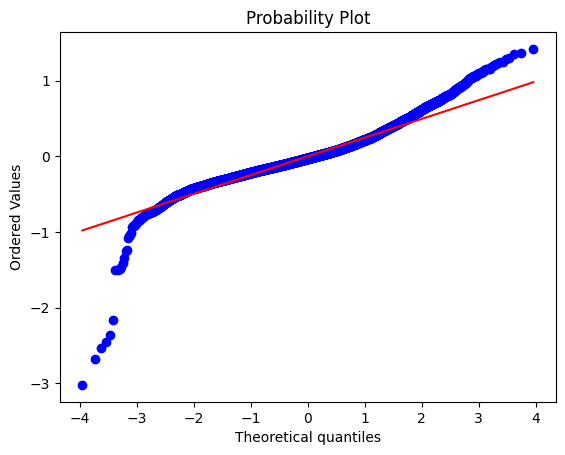

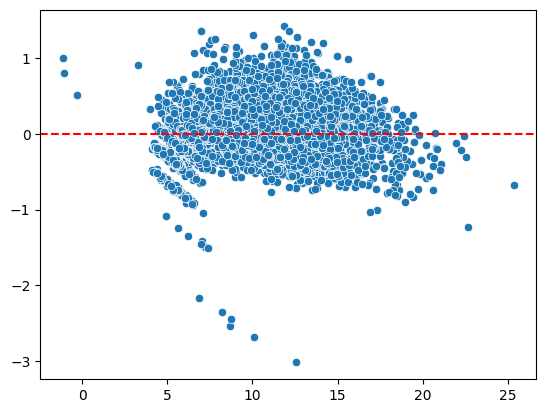

In [ ]:
# LASSO Cross Validation with 5 fold validation (computationally inexpensive)
# LOO validation uses all ram
lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000, random_state=42)

# Fit model will auto use our lambda value
lasso_cv.fit(X_tr, y_tr)

y_pred_lasso = lasso_cv.predict(X_te)
rmse_lasso = np.sqrt(mean_squared_error(y_te, y_pred_lasso))
r2_lasso = r2_score(y_te, y_pred_lasso)

print(f"Mean Squared Error: {rmse_lasso}")
print(f"R-Squared: {r2_lasso}")
coefficients = lasso_cv.coef_
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef}")


residuals = y_te - y_pred_lasso

stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


###### New Multiple Linear Regression

Mean Squared Error: 0.25174666743689744
R-Squared: 0.6615489842515382


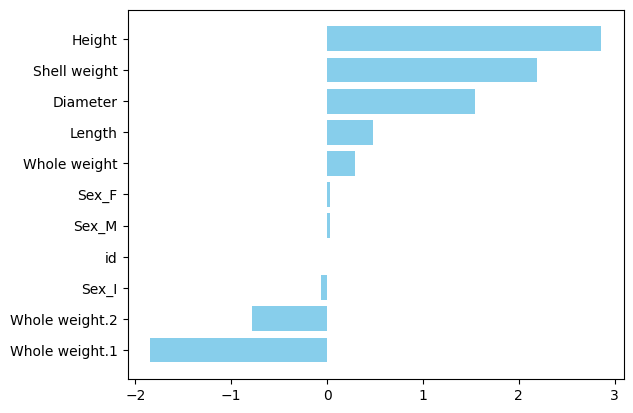

In [ ]:
lgm = LinearRegression()
lgm.fit(X_tr, y_tr)

y_pred = lgm.predict(X_te)
rmse = np.sqrt(mean_squared_error(y_te, y_pred))
r2 = r2_score(y_te, y_pred)
print(f"Mean Squared Error: {rmse}")
print(f"R-Squared: {r2}")
coefficients = lgm.coef_

feature_names = X_train.columns
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coeff_df = coeff_df.sort_values(by='Coefficient', ascending=True)
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='skyblue')

plt.show()


###### Random Forest Regressor
Given that our Box-cox transformation was unsuccessful in removing heteroscedasticity from the data, and the normality of our residual values is still in question, we will use the Random Forest Regressor for this problem, as we do not need to operate on the assumption of regularly distributed residuals and heteroscedasticity.

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 3.613989609887988
R-squared: 0.6481829851259228


###### Our Final Predictions

In [ ]:
# Feature set
X = train.drop('Rings', axis = 1)

# Responding variable
y = train['Rings']

rf_final = RandomForestRegressor(n_estimators = 200, random_state = 42)
rf.fit(X, y)


y_pred = rf.predict(test)


final_predictions = pd.DataFrame({'id': test['id'], 'Rings': y_pred})
final_predictions.set_index('id', inplace=True)
final_predictions.to_csv('jaeckl_abalone_predictions.csv')

In [ ]:
from google.colab import files
files.download('jaeckl_abalone_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>